In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
color_palt=sns.color_palette()

In [118]:
data=pd.read_csv('PJME_hourly.csv')

In [119]:
data.head(5)

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [120]:
data.tail(5)

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [121]:
data.sample(5)

,Datetime,PJME_MW
76600,2010-04-05 11:00:00,30794.0
53281,2008-12-02 14:00:00,34118.0
53692,2008-11-15 17:00:00,29666.0
17775,2004-12-21 20:00:00,42120.0
6952,2002-03-17 19:00:00,32202.0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [123]:
data.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [124]:
data.duplicated().sum()

0

In [125]:
data=data.set_index('Datetime')

In [126]:
data.index=pd.to_datetime(data.index)

In [127]:
data.head(5)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


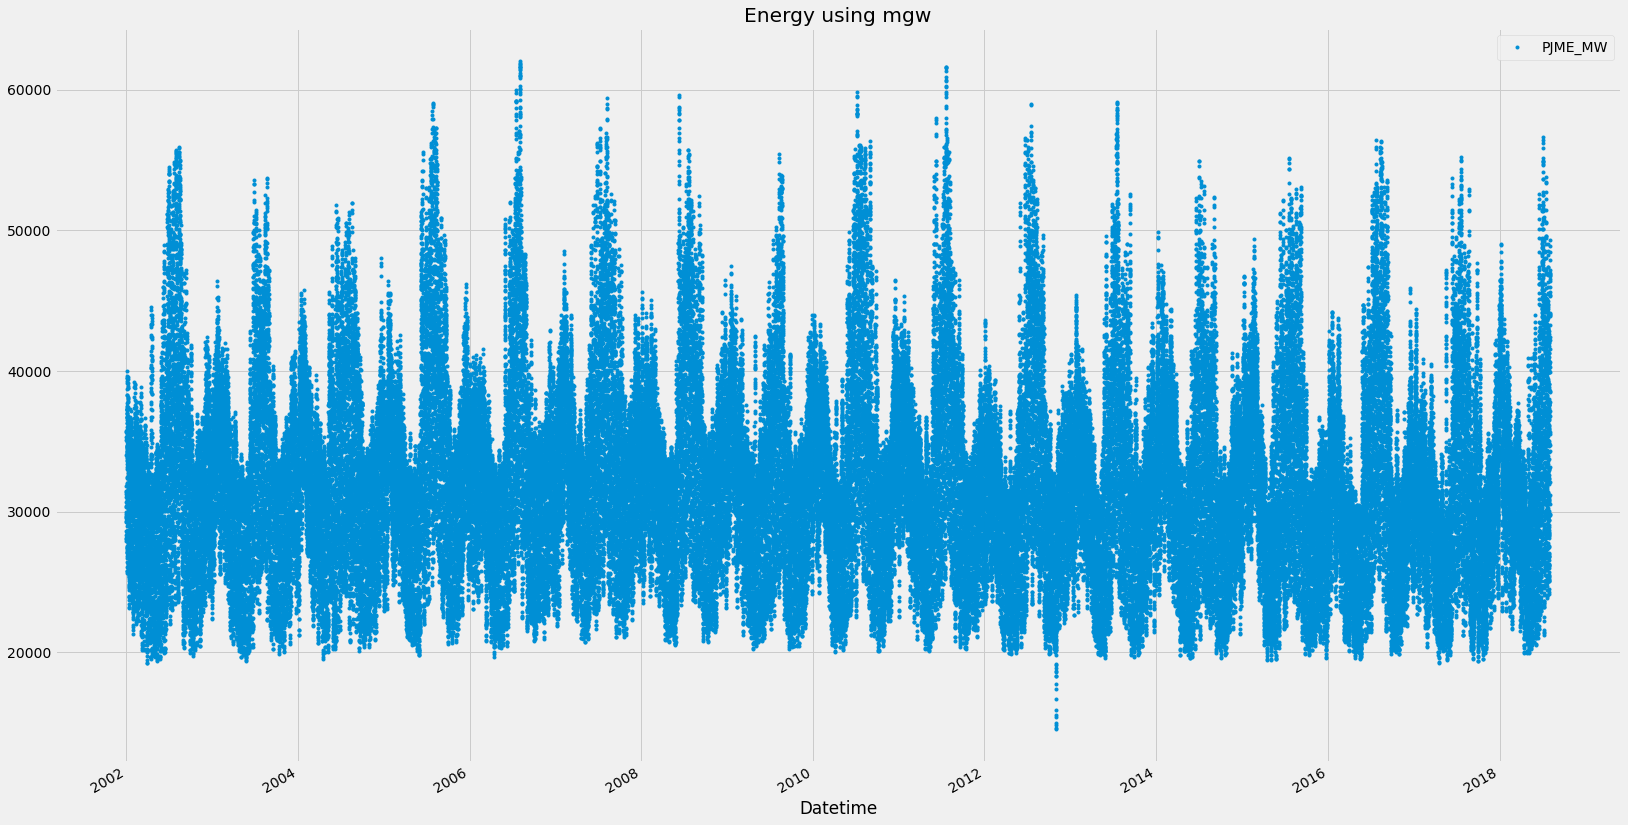

In [128]:
data.plot(figsize=(25,15),style='.',color=color_palt[0],title='Energy using mgw')
plt.show()

# Feature Creating

In [129]:
data['Hour']=data.index.hour
data['Dayofweek']=data.index.day_of_week
data['Month']=data.index.month
data['Quarter']=data.index.quarter
data['Year']=data.index.year
data['Dayofyear']=data.index.day_of_year
data

,PJME_MW,Hour,Dayofweek,Month,Quarter,Year,Dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


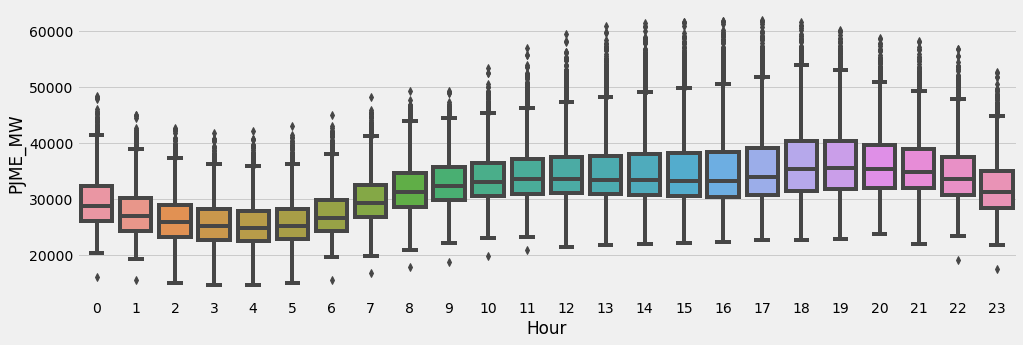

In [130]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='Hour',y='PJME_MW')
plt.show()

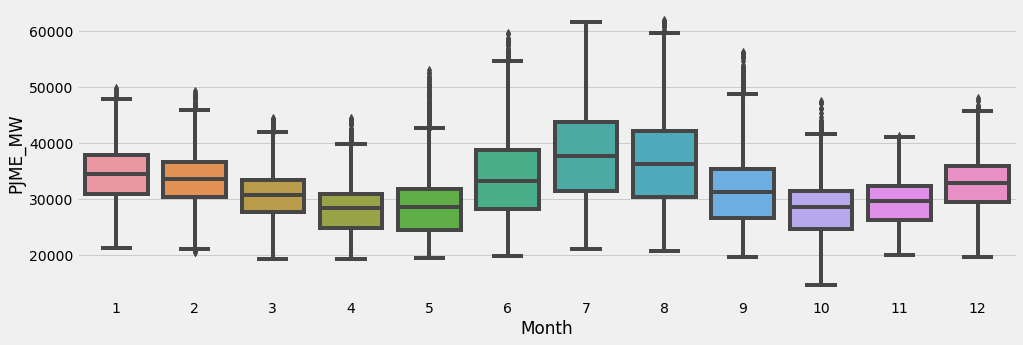

In [65]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='Month',y='PJME_MW')
plt.show()

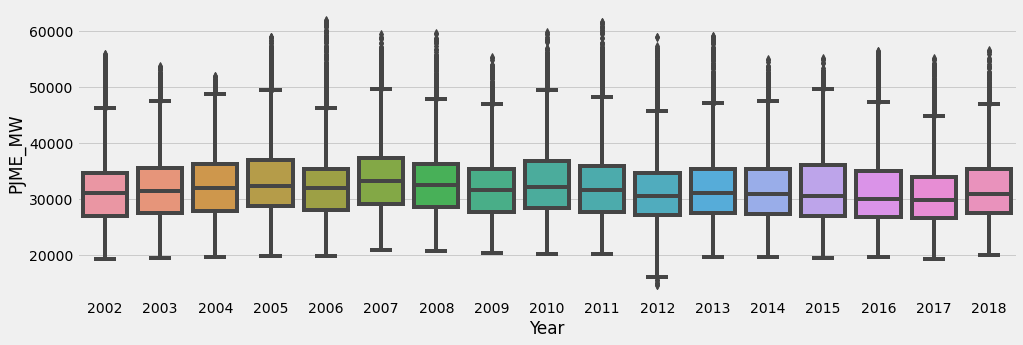

In [66]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='Year',y='PJME_MW')
plt.show()

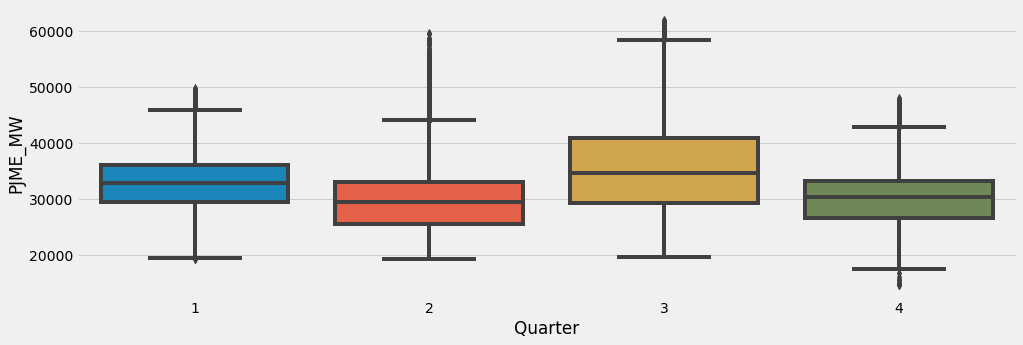

In [68]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='Quarter',y='PJME_MW')
plt.show()

In [131]:
train_set=data.loc[data.index<'01-01-2015']
test_set=data.loc[data.index>='01-01-2015']
train_set

,PJME_MW,Hour,Dayofweek,Month,Quarter,Year,Dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365
...,...,...,...,...,...,...,...
2014-01-01 20:00:00,36193.0,20,2,1,1,2014,1
2014-01-01 21:00:00,35601.0,21,2,1,1,2014,1
2014-01-01 22:00:00,34242.0,22,2,1,1,2014,1


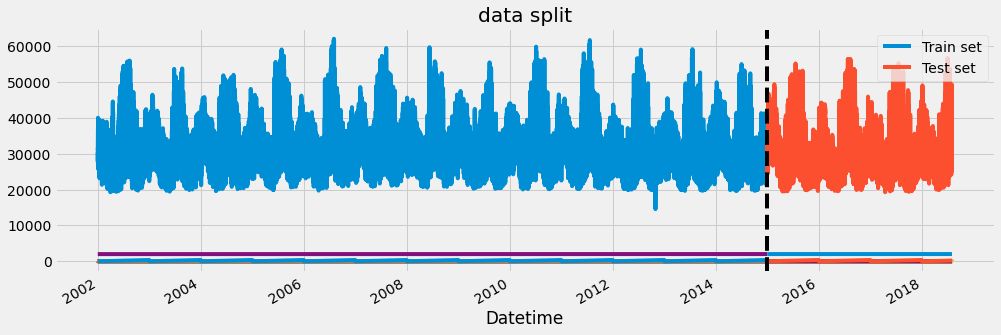

In [132]:
fig,ax=plt.subplots(figsize=(15,5))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('01-01-2015',color='black',ls='--')
plt.legend(['Train set','Test set'])
plt.title('data split')
plt.show()

In [133]:
x_train=train_set.drop('PJME_MW',axis=1)
y_train=train_set['PJME_MW']
x_test=test_set.drop('PJME_MW',axis=1)
y_test=test_set['PJME_MW']

In [134]:
model=XGBRegressor(n_estimator=1000,early_stopping_round=50)

In [135]:
model.fit(x_train,y_train)

[15:11:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [136]:
model.score(x_train,y_train)

0.9339877047391292

In [137]:
pre=model.predict(x_test)

In [138]:
mse=mean_squared_error(pre,y_test)

In [139]:
mse

18337906.9949062

In [140]:
np.sqrt(mse)

4282.278248188247

In [151]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    df['Dayofyear'] = df.index.dayofyear
    return df

In [152]:
data_future_datatime=pd.date_range('2018-01-01','2019-01-01',freq='1h')

In [154]:
data_future=pd.DataFrame(index=data_future_datatime)
DF=create_features(data_future)
DF.shape

(8761, 6)

In [155]:
pre=model.predict(DF)

In [156]:
DF['PJME_MW']=pre

<AxesSubplot:>

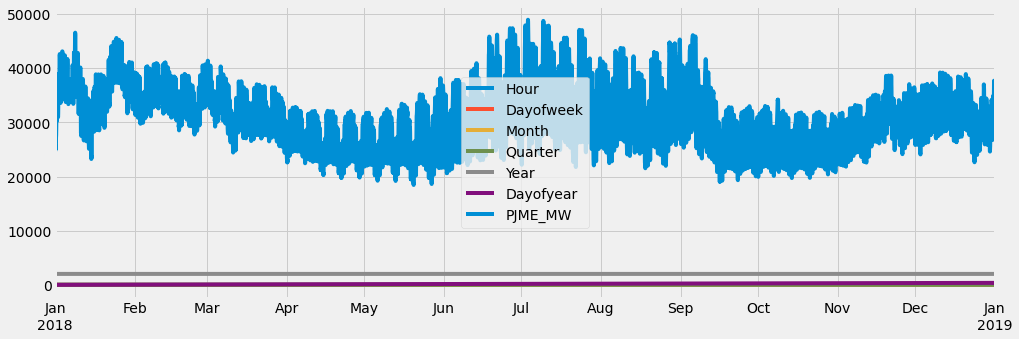

In [159]:
fig,ax=plt.subplots(figsize=(15,5))
DF.plot(ax=ax)

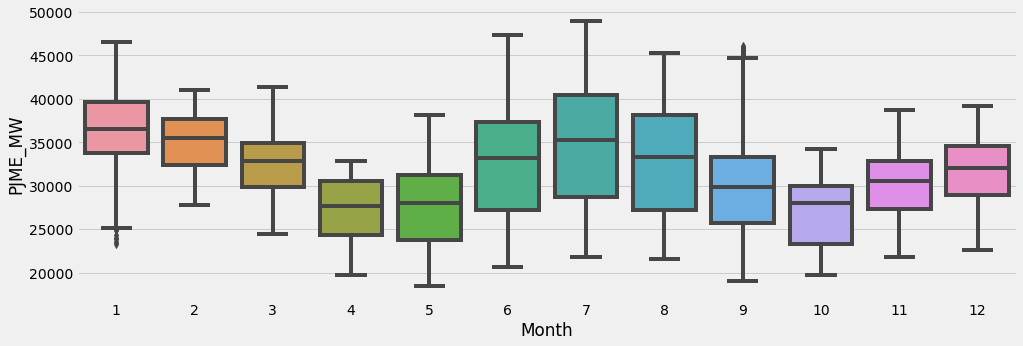

In [160]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=DF,x='Month',y='PJME_MW')
plt.show()

In [161]:
data_Future_2022=pd.date_range('2021-08-01','2022-08-01',freq='1h')

In [162]:
data_2022=pd.DataFrame(index=data_Future_2022)

In [169]:
df2=create_features(data_2022)

<AxesSubplot:>

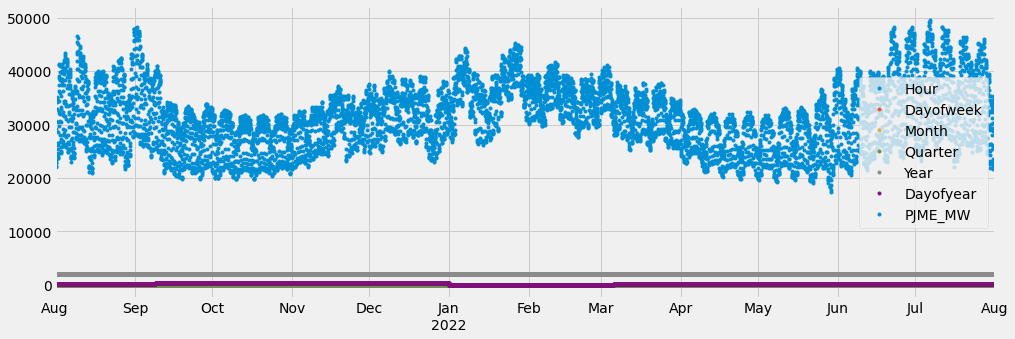

In [170]:
pre1=model.predict(df2)
df2['PJME_MW']=pre1
fig,ax=plt.subplots(figsize=(15,5))
df2.plot(ax=ax,style='.')

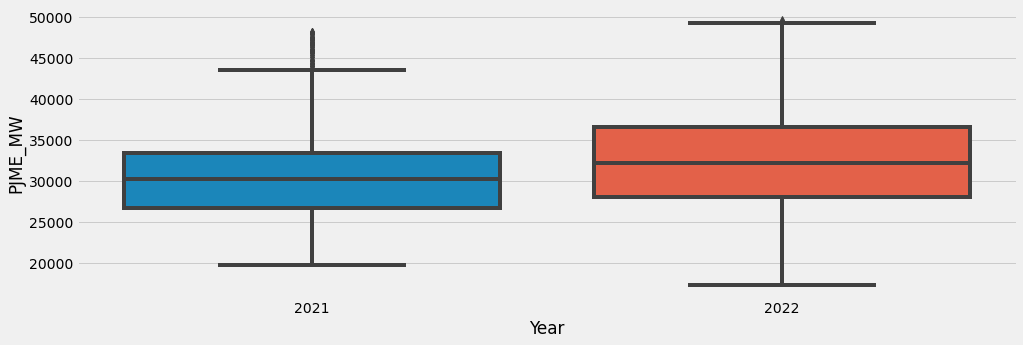

In [174]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df2,x='Year',y='PJME_MW')
plt.show()

In [177]:
data_future_2023=pd.date_range('2023-01-01','2023-08-01',freq='1h')
data_2023=pd.DataFrame(index=data_future_2023)
df3=create_features(data_2023)

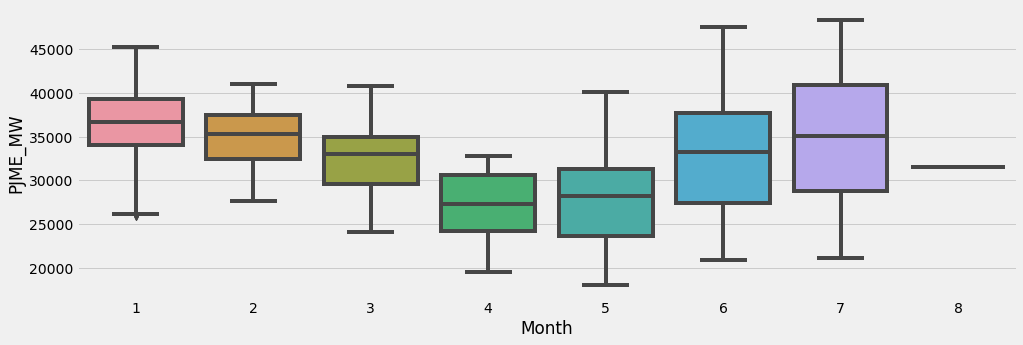

In [179]:
pre2=model.predict(df3)
df3['PJME_MW']=pre2
plt.subplots(figsize=(15,5))
sns.boxplot(data=df3,x='Month',y='PJME_MW')
plt.show()